In [188]:
import pandas as pd

In [189]:
caminho_arquivo = 'Data_IGD_VIS.csv'

In [191]:
try:
    # Tenta abrir com ',' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ",", encoding='UTF-8')
except pd.errors.ParserError:
    # Se ocorrer um erro, tente abrir com ';' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ";", encoding='UTF8')

In [193]:
pd_igd_vis.head()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
0,120001,ACRELÂNDIA,AC,jul/23,"67,55","94,46","83,01",82
1,120005,ASSIS BRASIL,AC,jul/23,"62,2","74,33","89,93","79,09"
2,120010,BRASILÉIA,AC,jul/23,"55,69","84,09","85,07","77,48"
3,120013,BUJARI,AC,jul/23,"73,72","83,85","92,11","85,44"
4,120017,CAPIXABA,AC,jul/23,"72,2","80,24","88,61","82,41"


In [194]:
pd_igd_vis.info

<bound method DataFrame.info of       Código Unidade Territorial  UF Referência  \
0     120001          ACRELÂNDIA  AC     jul/23   
1     120005        ASSIS BRASIL  AC     jul/23   
2     120010           BRASILÉIA  AC     jul/23   
3     120013              BUJARI  AC     jul/23   
4     120017            CAPIXABA  AC     jul/23   
...      ...                 ...  ..        ...   
5565  172120      TOCANTINÓPOLIS  TO     jul/23   
5566  172125            TUPIRAMA  TO     jul/23   
5567  172130          TUPIRATINS  TO     jul/23   
5568  172208        WANDERLÂNDIA  TO     jul/23   
5569  172210             XAMBIOÁ  TO     jul/23   

     TAFE - Taxa de Acompanhamento de Frequência Escolar  \
0                                                 67,55    
1                                                  62,2    
2                                                 55,69    
3                                                 73,72    
4                                                  72,2

In [195]:
pd_igd_vis.tail()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
5565,172120,TOCANTINÓPOLIS,TO,jul/23,"88,01","88,8","84,26","86,33"
5566,172125,TUPIRAMA,TO,jul/23,"71,34","89,88","82,82","81,71"
5567,172130,TUPIRATINS,TO,jul/23,"88,62","70,32","67,06","73,26"
5568,172208,WANDERLÂNDIA,TO,jul/23,"69,51","83,78","83,68","80,16"
5569,172210,XAMBIOÁ,TO,jul/23,"69,38","78,64","85,08","79,54"


In [196]:
# removendo colunas que não preciso
remover_colunas = ['TAFE - Taxa de Acompanhamento de Frequência Escolar' , 'TAAS - Taxa de Acompanhamene Agenda de Saúde' , 'TAC - Taxa de Atualização Cadastral']
df_igd = pd_igd_vis.drop(remover_colunas, axis = 1)

In [199]:
#renomeando colunas
df_igd = df_igd.rename(columns={'Código': 'ibge_6', 'Unidade Territorial': 'municipio' , 'Referência' : 'ano_mês' , 'Fator 1: Operação (  (TAFE+TAAS) / 2 +  TAC / 2)': 'igd_m'} )

In [200]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m
0,120001,ACRELÂNDIA,AC,jul/23,82
1,120005,ASSIS BRASIL,AC,jul/23,"79,09"
2,120010,BRASILÉIA,AC,jul/23,"77,48"
3,120013,BUJARI,AC,jul/23,"85,44"
4,120017,CAPIXABA,AC,jul/23,"82,41"
...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,"86,33"
5566,172125,TUPIRAMA,TO,jul/23,"81,71"
5567,172130,TUPIRATINS,TO,jul/23,"73,26"
5568,172208,WANDERLÂNDIA,TO,jul/23,"80,16"


In [201]:
#só agora percebi que a coluna do igd_m está em string. Vu converter em float
df_igd['igd_m'] = pd.to_numeric(df_igd['igd_m'].str.replace(',', '.', regex=True), errors='coerce')

In [202]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m
0,120001,ACRELÂNDIA,AC,jul/23,82.00
1,120005,ASSIS BRASIL,AC,jul/23,79.09
2,120010,BRASILÉIA,AC,jul/23,77.48
3,120013,BUJARI,AC,jul/23,85.44
4,120017,CAPIXABA,AC,jul/23,82.41
...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,86.33
5566,172125,TUPIRAMA,TO,jul/23,81.71
5567,172130,TUPIRATINS,TO,jul/23,73.26
5568,172208,WANDERLÂNDIA,TO,jul/23,80.16


In [163]:
#medo de perder as alteraçoes que fiz, vou salvar tudo num csv
df_igd.to_csv('igd.csv', index=False)

In [203]:
#vamos comerçar os gráficos. O primeiro será um ranking dos dez munícipios com menor IGD-M
!pip install matplotlib
import matplotlib.pyplot as plt

# Ordeando os valores de 'igd_m' em ordem decrescente para os 10 municipios com menor taxa
top_10_municipios_menor = df_igd.sort_values(by='igd_m', ascending=True).head(10)




[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
top_10_municipios_menor

,ibge_6,municipio,UF,ano_mês,igd_m
4258,431540,REDENTORA,RS,jul/23,58.67
4132,431060,ITAQUI,RS,jul/23,61.10
3919,430003,ACEGUÁ,RS,jul/23,61.53
443,292000,MAIQUINIQUE,BA,jul/23,61.54
192,160025,ITAUBAL,AP,jul/23,61.66
2061,316150,SÃO GERALDO,MG,jul/23,62.18
2068,316210,SÃO GOTARDO,MG,jul/23,62.23
368,291390,IPIAÚ,BA,jul/23,62.71
2436,150140,BELÉM,PA,jul/23,62.85
556,292905,SÃO FÉLIX DO CORIBE,BA,jul/23,63.35


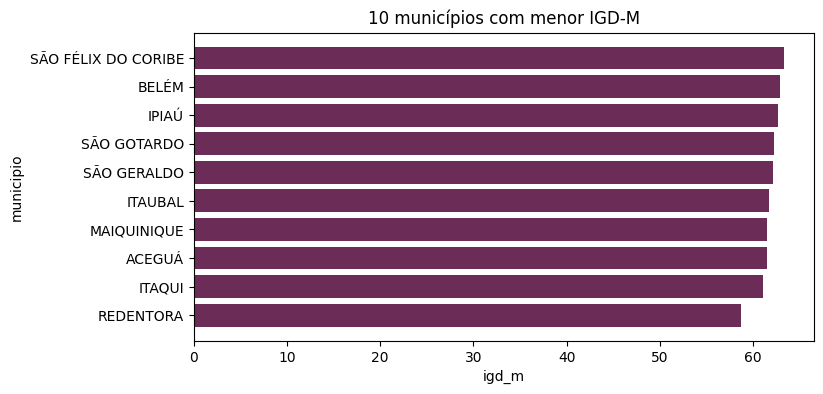

In [180]:
# Gráfico para os 10 municípios com menor taxa

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_menor['municipio'], top_10_municipios_menor['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com menor IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

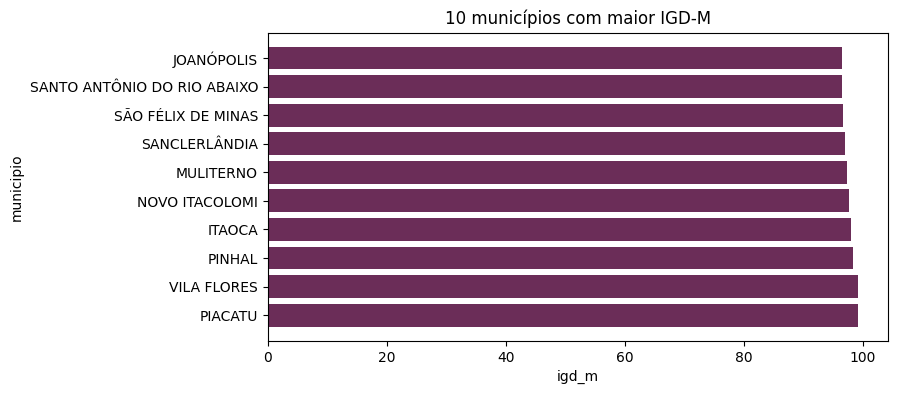

In [205]:
#Agora a mesma coisa para os dez municípios com as maiores taxas de IGD-M
top_10_municipios_maior = df_igd.sort_values(by='igd_m', ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_maior['municipio'], top_10_municipios_maior['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com maior IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

In [206]:
#Não entendi mto bem o motivo, mas resolvi criar dataframes por UF

grupo_ac = df_igd[df_igd['UF'] == 'AC']

grupo_al = df_igd[df_igd['UF'] == 'AL']

grupo_ap = df_igd[df_igd['UF'] == 'AP']

grupo_am = df_igd[df_igd['UF'] == 'AM']

grupo_ba = df_igd[df_igd['UF'] == 'BA']

grupo_ce = df_igd[df_igd['UF'] == 'CE']

grupo_df = df_igd[df_igd['UF'] == 'DF']

grupo_es = df_igd[df_igd['UF'] == 'ES']

grupo_go = df_igd[df_igd['UF'] == 'GO']

grupo_ma = df_igd[df_igd['UF'] == 'MA']

grupo_mt = df_igd[df_igd['UF'] == 'MT']

grupo_ms = df_igd[df_igd['UF'] == 'MS']

grupo_mg = df_igd[df_igd['UF'] == 'MG']

grupo_pa = df_igd[df_igd['UF'] == 'PA']

grupo_pb = df_igd[df_igd['UF'] == 'PB']

grupo_pr = df_igd[df_igd['UF'] == 'PR']

grupo_pe = df_igd[df_igd['UF'] == 'PE']

grupo_pi = df_igd[df_igd['UF'] == 'PI']

grupo_rj = df_igd[df_igd['UF'] == 'RJ']

grupo_rn = df_igd[df_igd['UF'] == 'RN']

grupo_rs = df_igd[df_igd['UF'] == 'RS']

grupo_ro = df_igd[df_igd['UF'] == 'RO']

grupo_rr = df_igd[df_igd['UF'] == 'RR']

grupo_sc = df_igd[df_igd['UF'] == 'SC']

grupo_sp = df_igd[df_igd['UF'] == 'SP']

grupo_se = df_igd[df_igd['UF'] == 'SE']

grupo_to = df_igd[df_igd['UF'] == 'TO']

In [207]:
#Vou visualizar novamente meus dados para entender de que forma eu posso agrupá-los
df_igd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5570 non-null   int64  
 1   municipio  5570 non-null   object 
 2   UF         5570 non-null   object 
 3   ano_mês    5570 non-null   object 
 4   igd_m      5543 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 217.7+ KB


In [208]:
df_igd.describe()

,ibge_6,igd_m
count,5570.000000,5543.000000
mean,325358.627828,83.964393
std,98491.033878,5.510169
min,110001.000000,58.670000
25%,251212.500000,80.640000
50%,314627.500000,84.540000
75%,411918.750000,87.900000
max,530010.000000,99.200000


In [210]:
#vamos dividir em dez grupos
Q1 = df_igd['igd_m'].quantile(0.1)
Q2 = df_igd['igd_m'].quantile(0.2)
Q3 = df_igd['igd_m'].quantile(0.3)
Q4 = df_igd['igd_m'].quantile(0.4)
Q5 = df_igd['igd_m'].quantile(0.5)  # Mediana (quintil 5)
Q6 = df_igd['igd_m'].quantile(0.6)
Q7 = df_igd['igd_m'].quantile(0.7)
Q8 = df_igd['igd_m'].quantile(0.8)
Q9 = df_igd['igd_m'].quantile(0.9)

print('Primeiro décimo: ', Q1)
print('Segundo décimo: ', Q2)
print('Terceiro décimo: ', Q3)
print('Quarto décimo: ', Q4)
print('Mediana (Quintil 5): ', Q5)
print('Sexto décimo: ', Q6)
print('Sétimo décimo: ', Q7)
print('Oitavo décimo: ', Q8)
print('Nono décimo: ', Q9)

Primeiro décimo:  76.71
Segundo décimo:  79.514
Terceiro décimo:  81.56
Quarto décimo:  83.07
Mediana (Quintil 5):  84.54
Sexto décimo:  85.86
Sétimo décimo:  87.21
Oitavo décimo:  88.686
Nono décimo:  90.51


In [233]:
#dei nomes pra eles que ficaram péssimos pois tem dois médios médios rs. Podemos avaliar em dividir em apenas 9 grupos
df_igd['QuintilRank'] = pd.qcut(
    df_igd['igd_m'],
    q=10,
    labels=[
        "primeiro décimo - baixíssimo",
        "segundo décimo - muito baixo",
        "terceiro décimo - baixo",
        "quarto décimo - médio baixo",
        "quinto décimo - médio menos",
        "sexto décimo - médio mais",
        "sétimo décimo - médio alto",
        "oitavo décimo -  alto",
        "nono décimo - muito alto",
        "décimo décimo - altíssimo"
    ])

In [215]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m,QuintilRank
0,120001,ACRELÂNDIA,AC,jul/23,82.00,quarto décimo - médio baixo
1,120005,ASSIS BRASIL,AC,jul/23,79.09,segundo décimo - baixo
2,120010,BRASILÉIA,AC,jul/23,77.48,segundo décimo - baixo
3,120013,BUJARI,AC,jul/23,85.44,sexto décimo - médio alto
4,120017,CAPIXABA,AC,jul/23,82.41,quarto décimo - médio baixo
...,...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,86.33,sétimo décimo - alto
5566,172125,TUPIRAMA,TO,jul/23,81.71,quarto décimo - médio baixo
5567,172130,TUPIRATINS,TO,jul/23,73.26,primeiro décimo - muito baixo
5568,172208,WANDERLÂNDIA,TO,jul/23,80.16,terceiro décimo - baixo


In [234]:
# verificando quantos municipios ficaram em cada grupo
contagem_quintis = df_igd['QuintilRank'].value_counts()

In [235]:
contagem_quintis

QuintilRank
primeiro décimo - baixíssimo    558
terceiro décimo - baixo         557
sexto décimo - médio mais       556
nono décimo - muito alto        556
sétimo décimo - médio alto      555
quinto décimo - médio menos     554
décimo décimo - altíssimo       553
quarto décimo - médio baixo     552
segundo décimo - muito baixo    551
oitavo décimo -  alto           551
Name: count, dtype: int64

In [226]:
# criar a média de cada quintil com base no valor de IGD-M
media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()

C:\Users\sesup\AppData\Local\Temp\ipykernel_18272\3175181018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()


In [236]:
media_quintil

QuintilRank
primeiro décimo - muito baixo    73.122168
segundo décimo - baixo           78.226987
terceiro décimo - baixo          80.627289
quarto décimo - médio baixo      82.365127
quinto décimo - médio            83.855686
sexto décimo - médio alto        85.231960
sétimo décimo - alto             86.571153
oitavo décimo - muito alto       87.916316
nono décimo - altíssimo          89.582932
décimo décimo - altíssimo        92.210542
Name: igd_m, dtype: float64

C:\Users\sesup\AppData\Local\Temp\ipykernel_18272\3086933990.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()


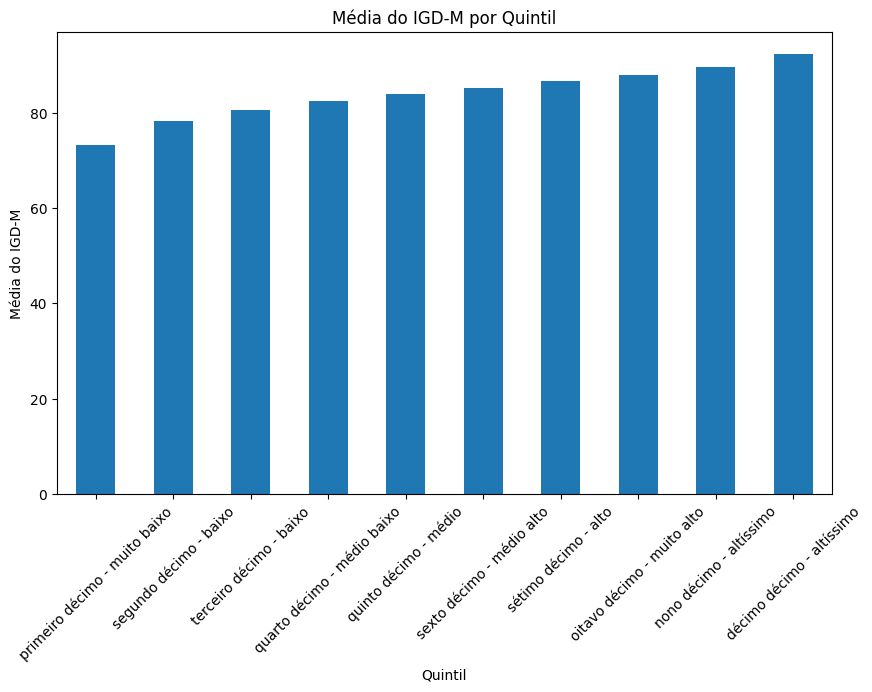

In [228]:
#Agora vou cirar um gráfico de barras com essas médias
media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()

# Plotar o gráfico de barras das médias por quintil
media_quintil.plot(kind='bar', figsize=(10, 6))
plt.title('Média do IGD-M por Quintil')
plt.xlabel('Quintil')
plt.ylabel('Média do IGD-M')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

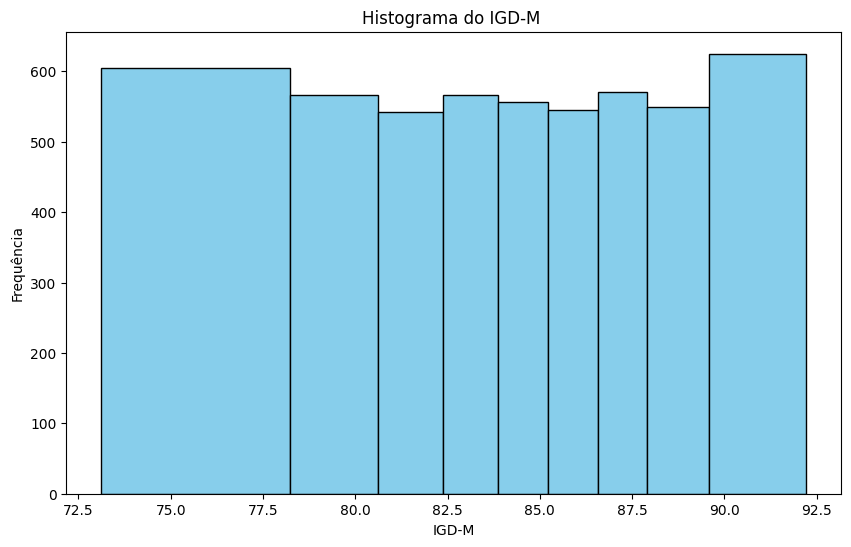

In [237]:
#finalmente um histograma, para verificarmos a frequencia que os valores aparecem em cada quintil 
dados = df_igd['igd_m']

# Suponha que 'media_quintil' já contenha as médias dos quintis calculadas anteriormente.
# Transforme a série em uma lista de valores.
medias_quintis = media_quintil.values

# Plotar o histograma com as médias dos quintis como bins
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.hist(dados, bins=medias_quintis, color='skyblue', edgecolor='black')
plt.title('Histograma do IGD-M ')
plt.xlabel('IGD-M')
plt.ylabel('Frequência')
plt.show()
